<a href="https://colab.research.google.com/github/milhaud1201/PyTorch_Tutorials/blob/main/Deep%20Learning%20Zero%20To%20All%20/Part_2_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab-08-1 Perceptron

## 학습목표

퍼셉트론(Perceptron) 에 대해 알아본다.

## 핵심키워드

퍼셉트론(Perceptron)  
선형분류기(Linear Classifier)  
AND, OR, XOR 게이트

## xor



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device='cuda')
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device='cuda')

In [ ]:
## nn Layers
linear = torch.nn.Linear(2, 1, bias=True)
sigmoid = torch.nn.Sigmoid()
model = torch.nn.Sequential(linear, sigmoid).to(device='cuda')

# define cost/Loss & optimizer
criterion = torch.nn.BCELoss().to(device='cuda')
optimizer = torch.optim.SGD(model.parameters(), lr=1)

for step in range(1001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/Loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())

0 0.7083841562271118
100 0.6931483745574951
200 0.6931471824645996
300 0.6931472420692444
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996


# Lab-08-2 Multi Layer Perceptron

## 학습목표

다중 퍼셉트론(Multi Layer Perceptron) 에 대해 알아본다.

## 핵심키워드

다중 퍼셉트론(Multi Layer Perceptron)  
오차역전파(Backpropagation)

### Code: xor-nn

In [ ]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device='cuda')
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device='cuda')

## nn Layers
linear1 = torch.nn.Linear(2, 2, bias=True)
linear2 = torch.nn.Linear(2, 1, bias=True)
sigmoid = torch.nn.Sigmoid()
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid).to(device='cuda')

# define cost/Loss & optimizer
criterion = torch.nn.BCELoss().to(device='cuda')
optimizer = torch.optim.SGD(model.parameters(), lr=1)

for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/Loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())

0 0.7522538900375366
100 0.6931231617927551
200 0.6929280161857605
300 0.6924945712089539
400 0.6908154487609863
500 0.6775641441345215
600 0.5852385759353638
700 0.46616268157958984
800 0.4035629332065582
900 0.3795297145843506
1000 0.36884215474128723
1100 0.36312833428382874
1200 0.3596494197845459
1300 0.3573334813117981
1400 0.35569053888320923
1500 0.35446906089782715
1600 0.3535274863243103
1700 0.35278084874153137
1800 0.3521749973297119
1900 0.35167402029037476
2000 0.3512531518936157
2100 0.35089489817619324
2200 0.35058632493019104
2300 0.35031789541244507
2400 0.3500823974609375
2500 0.34987401962280273
2600 0.3496885895729065
2700 0.34952235221862793
2800 0.34937262535095215
2900 0.3492370843887329
3000 0.34911373257637024
3100 0.34900110960006714
3200 0.3488978147506714
3300 0.3488028347492218
3400 0.3487151265144348
3500 0.34863391518592834
3600 0.34855854511260986
3700 0.34848839044570923
3800 0.34842291474342346
3900 0.348361611366272
4000 0.34830427169799805
4100 0.34

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

# nn layers
linear1 = torch.nn.Linear(2, 2, bias=True)
linear2 = torch.nn.Linear(2, 1, bias=True)
sigmoid = torch.nn.Sigmoid()

# model
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid).to(device)

# define cost/loss & optimizer
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1

for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())

# Accuracy computation
# True if hypothesis>0.5 else False
with torch.no_grad():
    predicted = (model(X) > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(), '\nAccuracy: ', accuracy.item())

0 0.7434072494506836
100 0.6931650638580322
200 0.6931577920913696
300 0.6931517124176025
400 0.6931463479995728
500 0.6931411027908325
600 0.693135678768158
700 0.6931295394897461
800 0.693122148513794
900 0.6931126713752747
1000 0.6930999755859375
1100 0.693082332611084
1200 0.6930568814277649
1300 0.6930190920829773
1400 0.6929606199264526
1500 0.6928659677505493
1600 0.6927032470703125
1700 0.6923960447311401
1800 0.6917300820350647
1900 0.6899654865264893
2000 0.6838319301605225
2100 0.6561682224273682
2200 0.4311133623123169
2300 0.13489647209644318
2400 0.06630530953407288
2500 0.042168572545051575
2600 0.03045409731566906
2700 0.02366606518626213
2800 0.019277825951576233
2900 0.016224082559347153
3000 0.013983854092657566
3100 0.012273991480469704
3200 0.010928163304924965
3300 0.009842487052083015
3400 0.008949032984673977
3500 0.008201336488127708
3600 0.007566767744719982
3700 0.007021686062216759
3800 0.006548595614731312
3900 0.006134253926575184
4000 0.005768374539911747

### Code: xor-nn-wide-deep

In [ ]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device='cuda')
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device='cuda')

## nn Layers
linear1 = torch.nn.Linear(2, 10, bias=True)
linear2 = torch.nn.Linear(10, 10, bias=True)
linear3 = torch.nn.Linear(10, 10, bias=True)
linear4 = torch.nn.Linear(10, 1, bias=True)
sigmoid = torch.nn.Sigmoid()
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid, linear3, sigmoid, linear4, sigmoid).to(device='cuda')

# define cost/Loss & optimizer
criterion = torch.nn.BCELoss().to(device='cuda')
optimizer = torch.optim.SGD(model.parameters(), lr=1)

for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/Loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())

0 0.6978083848953247
100 0.6931105256080627
200 0.6931018829345703
300 0.6930921673774719
400 0.6930808424949646
500 0.6930675506591797
600 0.6930519342422485
700 0.69303297996521
800 0.6930098533630371
900 0.6929808855056763
1000 0.6929439902305603
1100 0.692895770072937
1200 0.6928311586380005
1300 0.6927415132522583
1400 0.6926121711730957
1500 0.6924156546592712
1600 0.6920979022979736
1700 0.6915386915206909
1800 0.6904336214065552
1900 0.6878381371498108
2000 0.6797102689743042
2100 0.6408318281173706
2200 0.5488757491111755
2300 0.5083184242248535
2400 0.487520694732666
2500 0.31329506635665894
2600 0.020284105092287064
2700 0.0077512226998806
2800 0.004524867050349712
2900 0.003117209766060114
3000 0.0023459556978195906
3100 0.0018651896389201283
3200 0.0015393730718642473
3300 0.0013052920112386346
3400 0.0011296711163595319
3500 0.0009934453992173076
3600 0.0008848900906741619
3700 0.000796599080786109
3800 0.0007234817021526396
3900 0.000661970698274672
4000 0.00060958869289

# Lab-09-1 ReLU

## 학습목표

ReLU 활성화 함수에 대해 알아본다.

## 핵심키워드

ReLU  
Sigmoid  
Optimizer

## ReLU

$f(x) = max(0, x)$

```python
x = torch.nn.sigmoid(x)
x = torch.nn.relu(x)
```

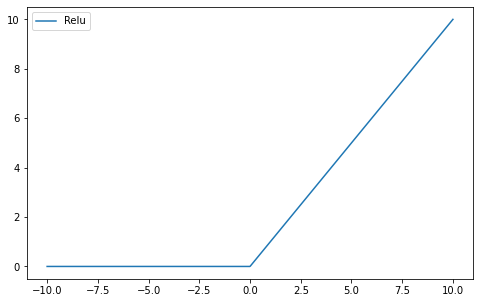

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-10, 10, 1000)
y = np.maximum(0, x)

plt.figure(figsize=(8, 5))
plt.plot(x, y)
plt.legend(['Relu'])
plt.show()

## Optimizer in PyTorch

* torch.optim.SGD
* torch.optim.Adadelta
* torch.optim.Adagrad
* torch.optim.Adam
* torch.optim.SparseAdam
* torch.optim.Adamax
* torch.optim.ASGD
* torch.optim.LBFGS
* torch.optim.RMSprop
* torch.optim.Rprop

### Code: mnist_softmax

In [ ]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
# parameters
learning_rate = 1e-3
training_epochs = 15
batch_size = 100

In [ ]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [ ]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [ ]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [ ]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(linear.parameters(), lr=learning_rate)

In [ ]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.614322782
Epoch: 0002 cost = 0.344514906
Epoch: 0003 cost = 0.308487236
Epoch: 0004 cost = 0.291329682
Epoch: 0005 cost = 0.281550318
Epoch: 0006 cost = 0.274611473
Epoch: 0007 cost = 0.269422829
Epoch: 0008 cost = 0.264997125
Epoch: 0009 cost = 0.261648208
Epoch: 0010 cost = 0.259036928
Epoch: 0011 cost = 0.256706297
Epoch: 0012 cost = 0.254275411
Epoch: 0013 cost = 0.252618015
Epoch: 0014 cost = 0.251062483
Epoch: 0015 cost = 0.249662459
Learning finished


In [ ]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.targets.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

Accuracy: 0.9071999788284302
Label:  8
Prediction:  3


/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


### Code: mnist_nn

In [ ]:
# parameters
learning_rate = 1e-3
training_epochs = 15
batch_size = 100

In [ ]:
# nn layers
linear1 = torch.nn.Linear(784, 256, bias=True)
linear2 = torch.nn.Linear(256, 256, bias=True)
linear3 = torch.nn.Linear(256, 10, bias=True)
relu = torch.nn.ReLU()

In [ ]:
# Initialization
torch.nn.init.normal_(linear1.weight)
torch.nn.init.normal_(linear2.weight)
torch.nn.init.normal_(linear3.weight)

Parameter containing:
tensor([[-0.3417, -0.1432, -0.2168,  ..., -1.7705, -0.3518, -1.8839],
        [-0.6825,  1.2642,  0.1248,  ...,  0.1173, -0.9166,  1.6033],
        [ 0.7507, -1.1337, -0.6434,  ...,  0.7531,  0.3646,  0.8004],
        ...,
        [-0.1065, -2.5800, -1.2971,  ...,  0.2555, -0.4023,  0.7031],
        [ 0.2406, -1.1735,  0.6788,  ..., -1.5424, -1.3025,  0.0885],
        [-1.5290, -0.7568,  0.5967,  ...,  0.4376, -0.5958, -1.0516]],
       requires_grad=True)

In [ ]:
# model
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

In [ ]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device) 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 130.750518799
Epoch: 0002 cost = 36.040737152
Epoch: 0003 cost = 22.519535065
Epoch: 0004 cost = 15.594206810
Epoch: 0005 cost = 11.024921417
Epoch: 0006 cost = 8.102440834
Epoch: 0007 cost = 5.978103638
Epoch: 0008 cost = 4.406246185
Epoch: 0009 cost = 3.258172989
Epoch: 0010 cost = 2.429973602
Epoch: 0011 cost = 1.790950418
Epoch: 0012 cost = 1.330271006
Epoch: 0013 cost = 1.108717561
Epoch: 0014 cost = 0.811608732
Epoch: 0015 cost = 0.739445686
Learning finished


In [ ]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.targets.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

Accuracy: 0.9071999788284302
Label:  5
Prediction:  3


# Lab-09-2 Weight initialization

## 학습목표

가중치 초기화(Weight Inititalization)에 대해 알아본다.

## 핵심키워드

가중치 초기화(Weight Inititalization)  
RBM inititalization  
Xavier / He inititalization

### Code: mnist_xavier

In [ ]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100


# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)


# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)


# nn layers
linear1 = torch.nn.Linear(784, 256, bias=True)
linear2 = torch.nn.Linear(256, 256, bias=True)
linear3 = torch.nn.Linear(256, 10, bias=True)
relu = torch.nn.ReLU()


# xavier initialization
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)

Parameter containing:
tensor([[ 0.0971,  0.0676,  0.1090,  ..., -0.1492, -0.0876, -0.0456],
        [ 0.0282,  0.0288,  0.0284,  ..., -0.1209, -0.1224, -0.1065],
        [ 0.0959, -0.1317,  0.0427,  ...,  0.1128,  0.0998, -0.0194],
        ...,
        [ 0.0776,  0.0072,  0.0894,  ...,  0.1459, -0.0689,  0.1469],
        [ 0.1398,  0.0116, -0.0880,  ..., -0.0007,  0.1098, -0.0030],
        [-0.0032, -0.0277,  0.0563,  ...,  0.0095, -0.0508,  0.0954]],
       requires_grad=True)

In [ ]:
# model
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)


# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device) 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.240632161
Epoch: 0002 cost = 0.088111296
Epoch: 0003 cost = 0.059663516
Epoch: 0004 cost = 0.043071490
Epoch: 0005 cost = 0.031818315
Epoch: 0006 cost = 0.024266712
Epoch: 0007 cost = 0.020237748
Epoch: 0008 cost = 0.018892795
Epoch: 0009 cost = 0.015171236
Epoch: 0010 cost = 0.015256101
Epoch: 0011 cost = 0.011704775
Epoch: 0012 cost = 0.014042822
Epoch: 0013 cost = 0.008679665
Epoch: 0014 cost = 0.006597608
Epoch: 0015 cost = 0.011575758
Learning finished


In [ ]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

Accuracy: 0.9776999950408936
Label:  7
Prediction:  7


# Lab-09-3 Dropout

## 학습목표

드롭아웃(Dropout) 에 대해 알아본다.

## 핵심키워드

과최적화(Overfitting)  
드롭아웃(Dropout) 

In [ ]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
keep_prob = 0.7


# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)


# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [ ]:
# nn layers
linear1 = torch.nn.Linear(784, 512, bias=True)
linear2 = torch.nn.Linear(512, 512, bias=True)
linear3 = torch.nn.Linear(512, 512, bias=True)
linear4 = torch.nn.Linear(512, 512, bias=True)
linear5 = torch.nn.Linear(512, 10, bias=True)
relu = torch.nn.ReLU()
dropout = torch.nn.Dropout(p=1 - keep_prob)


# xavier initialization
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)
torch.nn.init.xavier_uniform_(linear5.weight)

Parameter containing:
tensor([[ 0.1013,  0.0053,  0.0971,  ..., -0.0665,  0.0287, -0.0446],
        [-0.0769,  0.0265,  0.0179,  ...,  0.0110,  0.0256,  0.0362],
        [ 0.0818,  0.0969,  0.0738,  ...,  0.0405, -0.1058, -0.0111],
        ...,
        [ 0.0956,  0.1014, -0.0257,  ..., -0.0362,  0.0723,  0.0043],
        [-0.0504,  0.0369,  0.0684,  ...,  0.0905,  0.0754,  0.0589],
        [-0.0697,  0.0652,  0.1005,  ..., -0.1008,  0.0636, -0.0476]],
       requires_grad=True)

In [ ]:
# model
model = torch.nn.Sequential(linear1, relu, dropout,
                            linear2, relu, dropout,
                            linear3, relu, dropout,
                            linear4, relu, dropout,
                            linear5).to(device)

In [ ]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

total_batch = len(data_loader)
model.train()    # set the model to train mode (dropout=True)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.307285279
Epoch: 0002 cost = 0.144767687
Epoch: 0003 cost = 0.110665329
Epoch: 0004 cost = 0.094166458
Epoch: 0005 cost = 0.084667444
Epoch: 0006 cost = 0.074020423
Epoch: 0007 cost = 0.069688194
Epoch: 0008 cost = 0.062500820
Epoch: 0009 cost = 0.057284005
Epoch: 0010 cost = 0.054031365
Epoch: 0011 cost = 0.050470892
Epoch: 0012 cost = 0.049530797
Epoch: 0013 cost = 0.047440074
Epoch: 0014 cost = 0.046248231
Epoch: 0015 cost = 0.043374743
Learning finished


In [ ]:
# Test the model using test sets
with torch.no_grad():
    model.eval()  # set the model to evaluation mode (dropout=False) 

    # Test the model using test sets
    X_test = mnist_test.data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.targets.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.targets[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

Accuracy: 0.9822999835014343
Label:  9
Prediction:  9


# Lab-09-4 Batch Normalization

## 학습목표

Batch Normalization 에 대해 알아본다.

## 핵심키워드

Batch Normalization  
경사 소실(Gradient Vanishing) / 폭발(Exploding)

### Code: mnist_batchnorm

In [ ]:
# parameters
learning_rate = 0.01
training_epochs = 10
batch_size = 32

In [ ]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [ ]:
# dataset loader
train_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

test_loader = torch.utils.data.DataLoader(dataset=mnist_test,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          drop_last=True)

In [ ]:
# nn layers
linear1 = torch.nn.Linear(784, 32, bias=True)
linear2 = torch.nn.Linear(32, 32, bias=True)
linear3 = torch.nn.Linear(32, 10, bias=True)
relu = torch.nn.ReLU()
bn1 = torch.nn.BatchNorm1d(32)
bn2 = torch.nn.BatchNorm1d(32)

nn_linear1 = torch.nn.Linear(784, 32, bias=True)
nn_linear2 = torch.nn.Linear(32, 32, bias=True)
nn_linear3 = torch.nn.Linear(32, 10, bias=True)

In [ ]:
# model
bn_model = torch.nn.Sequential(linear1, relu, bn1,
                            linear2, relu, bn2,
                            linear3).to(device)
nn_model = torch.nn.Sequential(nn_linear1, relu,
                               nn_linear2, relu,
                               nn_linear3).to(device)

In [ ]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
bn_optimizer = torch.optim.Adam(bn_model.parameters(), lr=learning_rate)
nn_optimizer = torch.optim.Adam(nn_model.parameters(), lr=learning_rate)

In [ ]:
# Save Losses and Accuracies every epoch
# We are going to plot them later
train_losses = []
train_accs = []

valid_losses = []
valid_accs = []

train_total_batch = len(train_loader)
test_total_batch = len(test_loader)
for epoch in range(training_epochs):
    bn_model.train()  # set the model to train mode

    for X, Y in train_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        bn_optimizer.zero_grad()
        bn_prediction = bn_model(X)
        bn_loss = criterion(bn_prediction, Y)
        bn_loss.backward()
        bn_optimizer.step()

        nn_optimizer.zero_grad()
        nn_prediction = nn_model(X)
        nn_loss = criterion(nn_prediction, Y)
        nn_loss.backward()
        nn_optimizer.step()

    with torch.no_grad():
        bn_model.eval()

        # Test the model using train sets
        bn_loss, nn_loss, bn_acc, nn_acc = 0, 0, 0, 0
        for i, (X, Y) in enumerate(train_loader):
            X = X.view(-1, 28 * 28).to(device)
            Y = Y.to(device)

            bn_prediction = bn_model(X)
            bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
            bn_loss += criterion(bn_prediction, Y)
            bn_acc += bn_correct_prediction.float().mean()

            nn_prediction = nn_model(X)
            nn_correct_prediction = torch.argmax(nn_prediction, 1) == Y
            nn_loss += criterion(nn_prediction, Y)
            nn_acc += nn_correct_prediction.float().mean()

        bn_loss, nn_loss, bn_acc, nn_acc = bn_loss / train_total_batch, nn_loss / train_total_batch, bn_acc / train_total_batch, nn_acc / train_total_batch

        # Save train losses/acc
        train_losses.append([bn_loss, nn_loss])
        train_accs.append([bn_acc, nn_acc])
        print(
            '[Epoch %d-TRAIN] Batchnorm Loss(Acc): bn_loss:%.5f(bn_acc:%.2f) vs No Batchnorm Loss(Acc): nn_loss:%.5f(nn_acc:%.2f)' % (
            (epoch + 1), bn_loss.item(), bn_acc.item(), nn_loss.item(), nn_acc.item()))
        # Test the model using test sets
        bn_loss, nn_loss, bn_acc, nn_acc = 0, 0, 0, 0
        for i, (X, Y) in enumerate(test_loader):
            X = X.view(-1, 28 * 28).to(device)
            Y = Y.to(device)

            bn_prediction = bn_model(X)
            bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
            bn_loss += criterion(bn_prediction, Y)
            bn_acc += bn_correct_prediction.float().mean()

            nn_prediction = nn_model(X)
            nn_correct_prediction = torch.argmax(nn_prediction, 1) == Y
            nn_loss += criterion(nn_prediction, Y)
            nn_acc += nn_correct_prediction.float().mean()

        bn_loss, nn_loss, bn_acc, nn_acc = bn_loss / test_total_batch, nn_loss / test_total_batch, bn_acc / test_total_batch, nn_acc / test_total_batch

        # Save valid losses/acc
        valid_losses.append([bn_loss, nn_loss])
        valid_accs.append([bn_acc, nn_acc])
        print(
            '[Epoch %d-VALID] Batchnorm Loss(Acc): bn_loss:%.5f(bn_acc:%.2f) vs No Batchnorm Loss(Acc): nn_loss:%.5f(nn_acc:%.2f)' % (
                (epoch + 1), bn_loss.item(), bn_acc.item(), nn_loss.item(), nn_acc.item()))
        print()

print('Learning finished')

[Epoch 1-TRAIN] Batchnorm Loss(Acc): bn_loss:0.15844(bn_acc:0.95) vs No Batchnorm Loss(Acc): nn_loss:0.17941(nn_acc:0.95)
[Epoch 1-VALID] Batchnorm Loss(Acc): bn_loss:0.16411(bn_acc:0.95) vs No Batchnorm Loss(Acc): nn_loss:0.18746(nn_acc:0.95)

[Epoch 2-TRAIN] Batchnorm Loss(Acc): bn_loss:0.12180(bn_acc:0.96) vs No Batchnorm Loss(Acc): nn_loss:0.15641(nn_acc:0.95)
[Epoch 2-VALID] Batchnorm Loss(Acc): bn_loss:0.13826(bn_acc:0.96) vs No Batchnorm Loss(Acc): nn_loss:0.17910(nn_acc:0.95)

[Epoch 3-TRAIN] Batchnorm Loss(Acc): bn_loss:0.10577(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.16499(nn_acc:0.95)
[Epoch 3-VALID] Batchnorm Loss(Acc): bn_loss:0.12759(bn_acc:0.96) vs No Batchnorm Loss(Acc): nn_loss:0.20435(nn_acc:0.95)

[Epoch 4-TRAIN] Batchnorm Loss(Acc): bn_loss:0.08619(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.12469(nn_acc:0.96)
[Epoch 4-VALID] Batchnorm Loss(Acc): bn_loss:0.11456(bn_acc:0.96) vs No Batchnorm Loss(Acc): nn_loss:0.17966(nn_acc:0.96)

[Epoch 5-TRAIN] Batc

In [ ]:
def plot_compare(loss_list: list, ylim=None, title=None) -> None:
    bn = [i[0] for i in loss_list]
    nn = [i[1] for i in loss_list]

    plt.figure(figsize=(15, 10))
    plt.plot(bn, label='With BN')
    plt.plot(nn, label='Without BN')
    if ylim:
        plt.ylim(ylim)

    if title:
        plt.title(title)
    plt.legend()
    plt.grid('on')
    plt.show()

TypeError: ignored

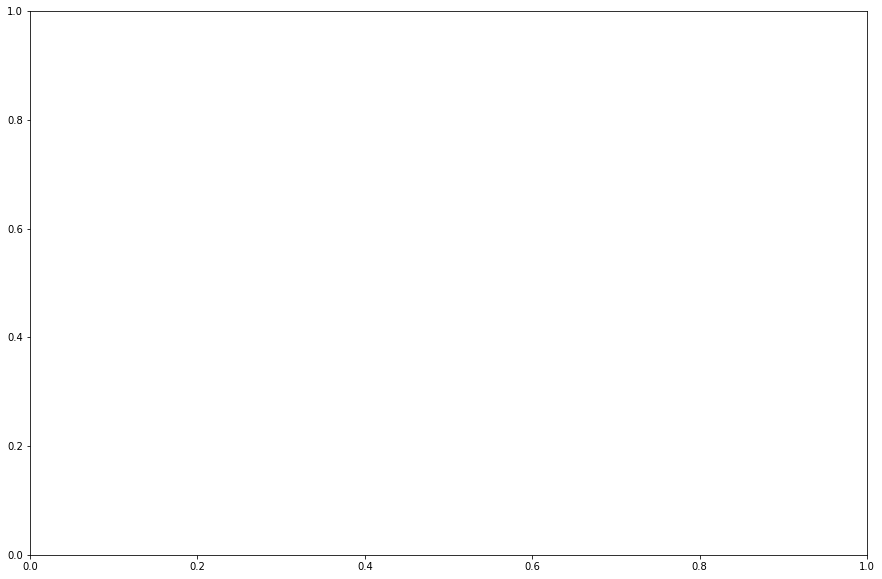

In [ ]:
plot_compare(train_losses, title='Training Loss at Epoch')
plot_compare(train_accs, [0, 1.0], title='Training Acc at Epoch')
plot_compare(valid_losses, title='Validation Loss at Epoch')
plot_compare(valid_accs, [0, 1.0], title='Validation Acc at Epoch')